In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Binary Classification

Here, we use a tabular dataset from kaggle (https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset) with features on patients physical spine details possibly suited for classifying whether the person is 'abnormal' or 'normal' - possibly suffers back pain or not.   

We here just want to see how the training works with logistic regression (binary case). We set aside a proper handling of the learning experiment by splitting the data into a train and test partition (in general we would even have a validation partition). We focus here on making the system learn something. 

### Load Data

In [3]:
import pandas as pd
df = pd.read_csv("./Dataset_spine.csv") # possibly modify!
df = df.drop(columns=['Unnamed: 13'])
N  = df.shape[0]
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


### Normalization and Turning into Torch Tensors

In [4]:
x0 = torch.from_numpy(df.values[:,0:-1].astype(np.float64))
X = (x0-torch.mean(x0, dim=0))/torch.std(x0,dim=0)
Y = torch.tensor(('Abnormal'==df.values[:,-1])).int().reshape(-1,1)
print(X.shape, Y.shape)

torch.Size([310, 12]) torch.Size([310, 1])


### (Binary) Logistic Regression

Data:  $\,\qquad X = \left(\begin{array}{cccc} 1 & X_{11} & \dots & X_{1n} \\ \vdots & \vdots & \vdots & \vdots \\ 1 & X_{N1} & \dots & X_{Nn}\end{array}\right)\qquad$ and $\qquad Y = \left(\begin{array}{c} Y_{1} \\ \vdots \\ Y_{N} \end{array}\right)$

Model: $\qquad\hat{Y}(X;W) = \sigma\left(X W^\intercal\right) \qquad$ where $\qquad W = \left(\begin{array}{c} W_0 \\ W_1 \\ \vdots \\ W_n \end{array}\right)$

The model outputs the probability of observing in a sample $x$ a '1' (Abnormal).

Cost:  $\,\qquad C(W) = -\frac{1}{N}\sum_j \left(Y_j\log(\hat{Y}_j(X;W)) + (1-Y_j)\log(1-\hat{Y}_j(X;W))\right)$

__Remark:__ Note that the logarithm diverges at arguments approaching 0. Make sure that you don't run into numerical issues.

In [5]:
# compose torch tensors X of shape (N,13) by inserting a column with 1's as first column  
X = torch.cat((torch.ones(N,1),X), dim=1)

In [6]:
# implement methods for predicting the probability of having label 0 or 1 (W with shape (1,13))
def predict(X,W):
    # YOUR CODE (START)
    return torch.sigmoid(X @ W.T)
    # YOUR CODE (END)

def cost(X:torch.tensor,Y:torch.tensor,W):
    # YOUR CODE (START)
    yHat = predict(X,W)
    return - (1/Y.size(0)) * torch.sum( Y * torch.log( yHat ) + (1-Y) * torch.log(1 - yHat) )
    
    # YOUR CODE (END)

In [7]:
def gradient_cost(X,Y,W):
    # YOUR CODE (START)
    return - (Y-predict(X,W)).T @ X/Y.size(0)
    # YOUR CODE (END)
    
def accuracy(Y,Yhat):
    # YOUR CODE (START)
    return torch.mean( ( Y == torch.round( Yhat ).int() ).float() )
    # YOUR CODE (END)

Just for testing:

In [11]:
W = torch.randn((1,13), dtype=torch.double)
print(predict(X[0],W))
print(cost(X,Y,W))
print(gradient_cost(X,Y,W))
print(accuracy(Y,predict(X,W)))

tensor([0.0018], dtype=torch.float64)
tensor(2.2427, dtype=torch.float64)
tensor([[-0.3438, -0.1644, -0.0145, -0.1300, -0.2003,  0.3556, -0.1431,  0.0689,
          0.1332,  0.0937, -0.0158, -0.0499, -0.1142]], dtype=torch.float64)
tensor(0.4355)


### Training

Training Accuracy (max,end): 0.841935, 0.838710
Training Cost (end): nan


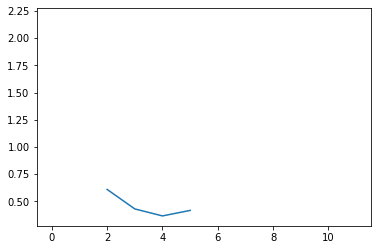

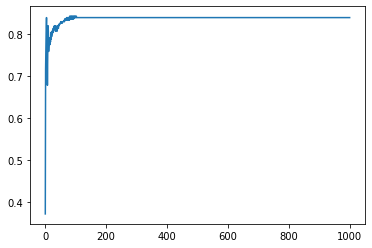

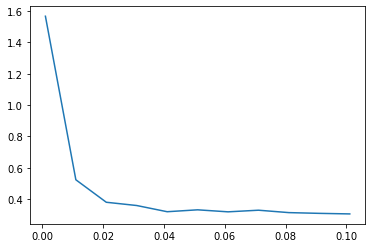

In [30]:
# adjust if needed
nepochs = 1000
learnarray = np.linspace(0.001, 10, 1000)
costMin = []

for lr in learnarray:
    ## initial parameter
    W = torch.randn((1,13), dtype=torch.double)

    # track the costs
    costs = [cost(X,Y,W)]
    accs = [accuracy(Y,predict(X,W))]

    # YOUR CODE (START)

    # loop over the epochs: update parameter values, compute the cost and add it to the costs list
    for epoch in range(nepochs):
        W = W - lr * gradient_cost(X,Y,W)
        costs.append(cost(X,Y,W))
        accs.append(accuracy(Y,predict(X,W)))

    costMin.append(costs[-1])
# YOUR CODE (END)
    
# some output
accs = np.array(accs)

print("Training Accuracy (max,end): %f, %f"%(np.max(accs), accs[-1]))
print("Training Cost (end): %f"%costs[-1].item())
plt.figure(1)
plt.plot(range(nepochs+1),costs)
plt.figure(2)
plt.plot(range(nepochs+1),accs)
plt.figure(3)
plt.plot(learnarray, costMin)

### Different Learning Rates

Play with different learning rates: Explore for what learning rates 
- the learning is most efficient
- the learning yet works
- the learning does not work anymore (learning rate too large)

Explain the different scenarios.